In [131]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.font_manager as fm
import matplotlib.ticker as mticker

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from datetime import datetime

In [132]:
class PlotData:
    
    def __init__(self):
        self.export_img = "../../report/img"
        self.processed_folder = "../../data/processed"

        os.makedirs(self.export_img, exist_ok=True)
        
    def plot_fiveyr_seasonal(self, file_import_name, chart_title, size, legend=None):
        
        # Import Data

        file_path_import = os.path.join(self.processed_folder, file_import_name)
        df = pd.read_csv(file_path_import)
        
        num_countries = len(df["REF_AREA"].unique())
        
        df = df.groupby('TIME_PERIOD')['OBS_VALUE'].sum().reset_index()

        # Cleaning the Data

        # Rename the columns for easier access
        df.columns = ['Date', 'Value']

        # Convert 'Date' column to datetime format
        df['Date'] = pd.to_datetime(df['Date'])

        # Extract week number, month, and year
        df['Week_Num'] = df['Date'].dt.isocalendar().week
        df['Month'] = df['Date'].dt.month
        df['Year'] = df['Date'].dt.year

        # Pivot the Data

        # Pivot the DataFrame to have Week_Num as rows, Year as columns, and Data as values
        pivoted_df = df.pivot_table(index='Month', columns='Year', values='Value')

        # Sort the columns to have years starting from the newest
        pivoted_df = pivoted_df.sort_index(axis=1, ascending=False)

        pivoted_df = pivoted_df.iloc[:,:6]

        fiveYearsRange = pivoted_df

        # Calculate the 5-year max, min, and average for each row
        pivoted_df["5YrMax"] = fiveYearsRange.max(axis=1)
        pivoted_df["5YrMin"] = fiveYearsRange.min(axis=1)
        pivoted_df["5YrAvg"] = fiveYearsRange.mean(axis=1)

        # Plot the Data

        # Paths to your Montserrat font files
        font_path = '../assets/Montserrat/static/Montserrat-Regular.ttf'
        font_path_bold = '../assets/Montserrat/static/Montserrat-Black.ttf'

        # Register the font properties
        prop = fm.FontProperties(fname=font_path)
        prop_black = fm.FontProperties(fname=font_path_bold)

        pivot_dataset = pivoted_df

        # Ensure plot_data is sorted by index (Week)
        plot_data = pivot_dataset.sort_index()

        # Create a numerical range for the x-axis based on the length of the DataFrame
        x_values = np.arange(len(plot_data)) + 1

        # Size Chart
        plt.figure(figsize=(size[0], size[1]))  # Adjusted height for better visibility

        # Plot the 5-Year Max/Min range as a shaded area
        plt.fill_between(x_values, plot_data['5YrMax'], plot_data['5YrMin'], color='lightgray', label='5-Year Range')

        # Colors
        fiveYear_avgColor = "black"
        fiveYear_PrevYrColor = "#FFA500"
        fiveYear_CurrentYrColor = "#003366"

        # Years

        current_yr = datetime.now().year - 1
        previous_yr = current_yr - 1

        # Plot 5-Year Average and actual values
        plt.plot(plot_data.index, plot_data['5YrAvg'], color=fiveYear_avgColor, linestyle='--', label='5-Year Average', linewidth=1)
        plt.plot(plot_data.index, plot_data[previous_yr], color=fiveYear_PrevYrColor, label=f'{previous_yr}', linewidth=1.5, alpha=0.7)
        plt.plot(plot_data.index, plot_data[current_yr], color=fiveYear_CurrentYrColor, marker='o', label=f'{current_yr}', linewidth=2)

            # Format y-axis values
        def thousands(x, pos):
            """Format the y-axis values with a dot as the thousand separator."""
            return f'{x/1000:,.0f}'.replace(',', '.')
        plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(thousands))

        y_label = "Million Barrels"

        if legend == None:

            plt.title(f'{chart_title} ({num_countries} Countries)', fontproperties=prop_black, size=20, pad=10)  # Larger title with size specified in title
            plt.xlabel("Month", fontproperties=prop, size=14)  # Larger x-label
            plt.ylabel(y_label, fontproperties=prop, size=14)  # Larger y-label

            # Place legend with regular font
            plt.legend(loc='lower right', prop=prop)

        else:

            plt.title(f'{chart_title} ({num_countries} Countries)', fontproperties=prop_black, size=12, pad=10)  # Larger title with size specified in title
            plt.xlabel("Month", fontproperties=prop, size=12)  # Larger x-label
            plt.ylabel(y_label, fontproperties=prop, size=12)  # Larger y-label

        plt.grid(True, linestyle='--', alpha=0.6)  # Add consistent grid style
        plt.tight_layout()

        # Save the plot as a PNG file
        export_file_name = f'{chart_title}'.replace(" ", "").replace("-", "") + ".png"
        export_file_path = os.path.join(self.export_img, export_file_name)

        os.makedirs(self.export_img, exist_ok=True)
        plt.savefig(export_file_path, bbox_inches='tight')

        # Show the plot
        plt.show()
        
    def z_score_calc(self, file_import_name, chart_title, size):
            
        # Import Data

        file_path_import = os.path.join(self.processed_folder, file_import_name)
        df = pd.read_csv(file_path_import)
        
        num_countries = len(df["REF_AREA"].unique())
        
        df = df.groupby('TIME_PERIOD')['OBS_VALUE'].sum().reset_index()

        # Cleaning the Data

        # Rename the columns for easier access
        df.columns = ['Date', 'Value']

        # Convert 'Date' column to datetime format
        df['Date'] = pd.to_datetime(df['Date'])

        # Extract week number, month, and year
        df['Week_Num'] = df['Date'].dt.isocalendar().week
        df['Month'] = df['Date'].dt.month
        df['Year'] = df['Date'].dt.year

        # Pivot the Data

        # Pivot the DataFrame to have Month as rows, Year as columns, and Data as values
        pivoted_df = df.pivot_table(index='Month', columns='Year', values='Value')
        
        # Sort the columns to have years starting from the newest
        pivoted_df = pivoted_df.sort_index(axis=1, ascending=False)

        pivoted_df = pivoted_df.iloc[:,:13]
        
        # Calculating the Z-Score
        
        z_score_columns = []
    
        rowIndex = 1
        i = 0
        
        while rowIndex < 7:
            # Current Year
            z_score_dataset = pivoted_df.iloc[:,rowIndex:(12+i)]
            tenYearsRange = pivoted_df.iloc[:, rowIndex:(12+i)]
            
            # # Calculate the 10-year mean and std for each row
            z_score_dataset["TimeAverage"] = tenYearsRange.mean(axis=1)
            z_score_dataset["TimeStd"] = tenYearsRange.std(axis=1)
            
            # Calculate the 10-year mean and std for each row (e.g., each month)
            z_score_dataset["TimeAverage"] = tenYearsRange.mean(axis=1)
            z_score_dataset["TimeStd"] = tenYearsRange.std(axis=1)
            
            # Calculate the Z-score for the current year (assuming it's the first column)
            current_year_column = z_score_dataset.columns[0]  # First column of the dataset
            z_score_year = (
                (z_score_dataset[current_year_column] - z_score_dataset["TimeAverage"]) 
                / z_score_dataset["TimeStd"]
            )
            
            z_score_columns.append(z_score_year)
            
            rowIndex += 1
            i += 1
        
            # Create a DataFrame
        zScore_dataset = pd.DataFrame({
            f'{pivoted_df.columns[0]}': z_score_columns[0],
            f'{pivoted_df.columns[1]}': z_score_columns[1],
            f'{pivoted_df.columns[2]}': z_score_columns[2],
            f'{pivoted_df.columns[3]}': z_score_columns[3],
            f'{pivoted_df.columns[4]}': z_score_columns[4],
            f'{pivoted_df.columns[5]}': z_score_columns[5],
        })
        
         
        zScore_dataset.iloc[pivoted_df.isna().any(axis=1).to_numpy().argmax():,0] = float('nan')
        
        # Plotting Chart
        
        # Paths to your Montserrat font files
        font_path = '../assets/Montserrat/static/Montserrat-Regular.ttf'
        font_path_bold = '../assets/Montserrat/static/Montserrat-Black.ttf'
        
        # Register the font properties
        prop = fm.FontProperties(fname=font_path)
        prop_bold = fm.FontProperties(fname=font_path_bold)

        # Prepare data
        plot_data = zScore_dataset.copy()
        
        # Ensure plot_data is sorted by index (Week)
        plot_data = plot_data.sort_index()
        
        
        # Identify current year, previous year, and previous previous year (assumes columns are sorted in descending order)
        current_year = datetime.now().year - 1
        prev_year = current_year - 1
        prev_prev_year = current_year - 2
        
        # Size Chart
        plt.figure(figsize=(size[0], size[1]))  # Adjusted height for better visibility

        # Colors
        PrevPrevYrColor = "#7F588E"
        PrevYrColor = "#FFA500"
        CurrentYrColor = "#003366"
        
        plt.plot(plot_data.index, plot_data[f"{prev_prev_year}"], color=PrevPrevYrColor, label=f'ZScore{prev_prev_year}', linewidth=1.5, alpha=0.7)
        plt.plot(plot_data.index, plot_data[f"{prev_year}"], color=PrevYrColor, label=f'ZScore{prev_year}', linewidth=1.5, alpha=0.7)
        plt.plot(plot_data.index, plot_data[f"{current_year}"], color=CurrentYrColor, label=f'ZScore{current_year}', linewidth=1.5, alpha=0.7)

        # Customize the plot with Montserrat font
        plt.title(f"{chart_title}", fontproperties=prop_bold, size=20, pad=10)
        plt.xlabel("Week", fontsize=14, fontproperties=prop)
        plt.ylabel("Std Away from 10-yr Avg.", fontsize=14, fontproperties=prop)

        # Position the legend in the top-left corner with a highlighted background
        # Place legend with regular font
        plt.legend(loc='upper right', prop=prop)
        plt.grid(True, linestyle='--', alpha=0.6)  # Add consistent grid style
        plt.tight_layout()

        # Add grid
        plt.grid(True)

        # Adjust layout
        plt.tight_layout()

        # Save the plot as a PNG file
        export_file_name = f'{chart_title}'.replace(" ", "").replace("-", "") + ".png"
        export_file_path = os.path.join(self.export_img, export_file_name)

        os.makedirs(self.export_img, exist_ok=True)
        plt.savefig(export_file_path, bbox_inches='tight')
        
        plt.show()  # Displays the plot


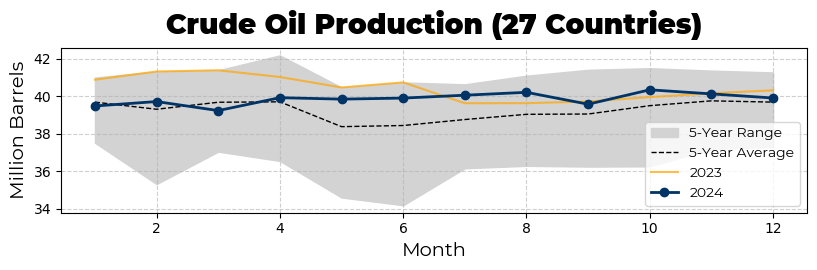

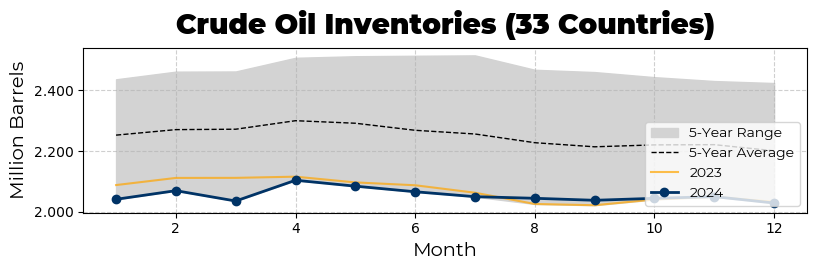

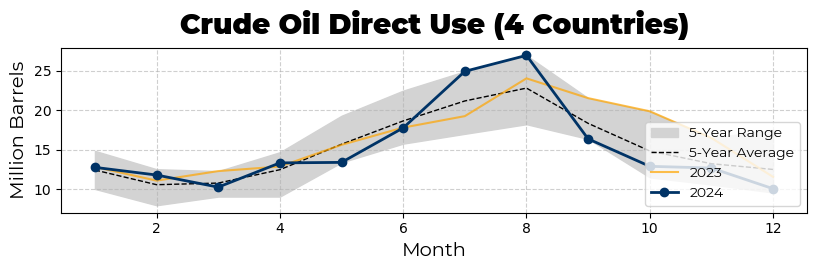

/var/folders/ym/3qhchx8d19q8jp5fvb95q9vw0000gn/T/ipykernel_22085/3490923848.py:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z_score_dataset["TimeAverage"] = tenYearsRange.mean(axis=1)
/var/folders/ym/3qhchx8d19q8jp5fvb95q9vw0000gn/T/ipykernel_22085/3490923848.py:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z_score_dataset["TimeAverage"] = tenYearsRange.mean(axis=1)
/var/folders/ym/3qhchx8d19q8jp5fvb95q9vw0000gn/T/ipykernel_22085/3490923848.py:172: SettingWithCopyWarning: 
A value is trying to be

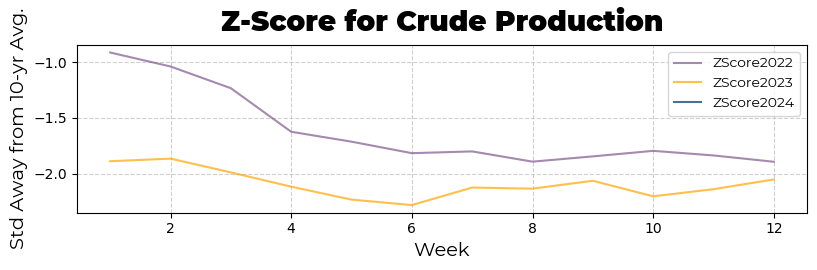

In [133]:
PlotData().plot_fiveyr_seasonal("CRUDEOIL_INDPROD_KBD.csv", "Crude Oil Production", size = [8.27, 2.8])
PlotData().plot_fiveyr_seasonal("CRUDEOIL_CLOSTLV_KBBL.csv", "Crude Oil Inventories", size = [8.27, 2.8])
PlotData().plot_fiveyr_seasonal("CRUDEOIL_DIRECUSE_KBBL.csv", "Crude Oil Direct Use", size = [8.27, 2.8])

# Export Z-Score
PlotData().z_score_calc("CRUDEOIL_CLOSTLV_KBBL.csv", "Z-Score for Crude Production",size = [8.27, 2.8])